In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from data import *
from features import *
from stats import *
from preprocess import *
from step import Step
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [11]:
load = Step(load_odr)
young = Step(subset, load, key='monkey', value='YOUNG')
gtn = Step(gt_n_trials, young, n=10)
win = Step(win_cts_by_trial, gtn, wins=[[1500, 3000]])
wcbw = Step(win_cts_by_win, win)
stat = Step(stat_tests, wcbw)
sigt = Step(sig_stat, stat, stat='t_p', alpha=1e-3)
sel = Step(select, sigt)
win2 = Step(win_cts_by_trial, sel, win_start=1000, win_end=4000, win_size=200, win_stride=50)
wcbw2 = Step(win_cts_by_win, win2)


In [12]:
win_cts = wcbw2()['win_cts']
win_cts

KeyError: "['monkey', 'area'] not found in axis"

In [53]:
# turn values of cell into columns
win_cts = win_cts.reset_index()
win_cts = win_cts.pivot(index=['position', 'trial', 'win'], columns='cell', values='win_cts')
win_cts

cell               YOUNG-PFC-019 YOUNG-PFC-020 YOUNG-PFC-050 YOUNG-PFC-051  \
position trial win                                                           
0        0     0             0.0           0.0           0.0           4.0   
               1             0.0           0.0           0.0           1.0   
               2             0.0           1.0           0.0           5.0   
               3             0.0           1.0           0.0           7.0   
               4             0.0           1.0           0.0           7.0   
...                          ...           ...           ...           ...   
7        9     52            2.0           0.0           2.0           4.0   
               53            1.0           0.0           3.0           4.0   
               54            0.0           0.0           4.0           5.0   
               55            0.0           0.0           4.0           6.0   
               56            0.0           0.0           3.0           4.0   

cell               YOUNG-PFC-094 YOUNG-PFC-104 YOUNG-PFC-113 YOUNG-PFC-117  \
position trial win                                                           
0        0     0             3.0           1.0           0.0           3.0   
               1             4.0           2.0           0.0           3.0   
               2             4.0           1.0           0.0           3.0   
               3             4.0           1.0           0.0           2.0   
               4             3.0           1.0           0.0           1.0   
...                          ...           ...           ...           ...   
7        9     52            5.0           0.0           0.0           3.0   
               53            4.0           0.0           0.0           2.0   
               54            3.0           1.0           0.0           1.0   
               55            3.0           2.0           0.0           3.0   
               56            2.0           4.0           1.0           7.0   

cell               YOUNG-PFC-132 YOUNG-PFC-133  ... YOUNG-PFC-271  \
position trial win                              ...                 
0        0     0             1.0           0.0  ...           0.0   
               1             1.0           0.0  ...           0.0   
               2             2.0           0.0  ...           0.0   
               3             1.0           0.0  ...           0.0   
               4             3.0           0.0  ...           0.0   
...                          ...           ...  ...           ...   
7        9     52            0.0           0.0  ...           1.0   
               53            0.0           0.0  ...           1.0   
               54            0.0           0.0  ...           2.0   
               55            0.0           0.0  ...           1.0   
               56            0.0           0.0  ...           2.0   

cell               YOUNG-PFC-272 YOUNG-PFC-277 YOUNG-PFC-297 YOUNG-PFC-299  \
position trial win                                                           
0        0     0             0.0           5.0           2.0           3.0   
               1             1.0           4.0           2.0           3.0   
               2             1.0           5.0           1.0           2.0   
               3             1.0           3.0           1.0           4.0   
               4             1.0           4.0           0.0           5.0   
...                          ...           ...           ...           ...   
7        9     52            2.0           0.0           0.0           1.0   
               53            2.0           0.0           2.0           1.0   
               54            3.0           0.0           2.0           2.0   
               55            4.0           0.0           2.0           3.0   
               56            3.0           1.0           2.0           5.0   

cell               YOUNG-PFC-348 YOUNG-PFC-350 YOUNG-PFC-

In [54]:
ss = StandardScaler()
wc = ss.fit_transform(win_cts)
win_cts = pd.DataFrame(wc, columns=win_cts.columns, index=win_cts.index)
win_cts

cell                YOUNG-PFC-019  YOUNG-PFC-020  YOUNG-PFC-050  \
position trial win                                                
0        0     0        -0.743468      -0.544028      -0.781514   
               1        -0.743468      -0.544028      -0.781514   
               2        -0.743468       0.350480      -0.781514   
               3        -0.743468       0.350480      -0.781514   
               4        -0.743468       0.350480      -0.781514   
...                           ...            ...            ...   
7        9     52        0.554053      -0.544028       0.626034   
               53       -0.094708      -0.544028       1.329808   
               54       -0.743468      -0.544028       2.033582   
               55       -0.743468      -0.544028       2.033582   
               56       -0.743468      -0.544028       1.329808   

cell                YOUNG-PFC-051  YOUNG-PFC-094  YOUNG-PFC-104  \
position trial win                                                
0        0     0        -0.128939       0.654210      -0.287996   
               1        -1.059601       1.164342       0.122272   
               2         0.181281       1.164342      -0.287996   
               3         0.801722       1.164342      -0.287996   
               4         0.801722       0.654210      -0.287996   
...                           ...            ...            ...   
7        9     52       -0.128939       1.674474      -0.698264   
               53       -0.128939       1.164342      -0.698264   
               54        0.181281       0.654210      -0.287996   
               55        0.491502       0.654210       0.122272   
               56       -0.128939       0.144079       0.942808   

cell                YOUNG-PFC-113  YOUNG-PFC-117  YOUNG-PFC-132  \
position trial win                                                
0        0     0        -0.758928       0.199321       0.269461   
               1        -0.758928       0.199321       0.269461   
               2        -0.758928       0.199321       1.129836   
               3        -0.758928      -0.179389       0.269461   
               4        -0.758928      -0.558099       1.990211   
...                           ...            ...            ...   
7        9     52       -0.758928       0.199321      -0.590914   
               53       -0.758928      -0.179389      -0.590914   
               54       -0.758928      -0.558099      -0.590914   
               55       -0.758928       0.199321      -0.590914   
               56       -0.026657       1.714162      -0.590914   

cell                YOUNG-PFC-133  ...  YOUNG-PFC-271  YOUNG-PFC-272  \
position trial win                 ...                                 
0        0     0        -0.851015  ...      -0.678677      -0.851173   
               1        -0.851015  ...      -0.678677      -0.406421   
               2        -0.851015  ...      -0.678677      -0.406421   
               3        -0.851015  ...      -0.678677      -0.406421   
               4        -0.851015  ...      -0.678677      -0.406421   
...                           ...  ...            ...            ...   
7        9     52       -0.851015  ...      -0.460644       0.038331   
               53       -0.851015  ...      -0.460644       0.038331   
               54       -0.851015  ...      -0.242610       0.483082   
               55       -0.851015  ...      -0.460644       0.927834   
               56       -0.851015  ...      -0.242610       0.483082   

cell                YOUNG-PFC-277  YOUNG-PFC-297  YOUNG-PFC-299  \
position trial win                                                
0        0     0         3.190021      -0.258487       0.276380   
               1         2.438576      -0.258487       0.276380   
               2         3.190021      -0.594193      -0.244243   
               3         1.687131      -0.594193       0.797003   
               4         2.438576      -0.929

In [55]:
# win_cts = win_cts.loc[:,0,:]
# win_cts

cell          YOUNG-PFC-019  YOUNG-PFC-020  YOUNG-PFC-050  YOUNG-PFC-051  \
position win                                                               
0        0        -0.743468      -0.544028      -0.781514      -0.128939   
         1        -0.743468      -0.544028      -0.781514      -1.059601   
         2        -0.743468       0.350480      -0.781514       0.181281   
         3        -0.743468       0.350480      -0.781514       0.801722   
         4        -0.743468       0.350480      -0.781514       0.801722   
...                     ...            ...            ...            ...   
7        52       -0.094708      -0.544028      -0.077740      -0.128939   
         53        0.554053       0.350480       0.626034      -0.128939   
         54        0.554053       0.350480       0.626034      -0.439160   
         55        0.554053       0.350480       0.626034      -1.059601   
         56        0.554053       0.350480      -0.077740      -1.369822   

cell          YOUNG-PFC-094  YOUNG-PFC-104  YOUNG-PFC-113  YOUNG-PFC-117  \
position win                                                               
0        0         0.654210      -0.287996      -0.758928       0.199321   
         1         1.164342       0.122272      -0.758928       0.199321   
         2         1.164342      -0.287996      -0.758928       0.199321   
         3         1.164342      -0.287996      -0.758928      -0.179389   
         4         0.654210      -0.287996      -0.758928      -0.558099   
...                     ...            ...            ...            ...   
7        52       -0.876185      -0.287996      -0.026657      -0.558099   
         53       -0.876185      -0.698264      -0.026657      -0.558099   
         54       -0.876185      -0.698264      -0.758928      -0.179389   
         55       -0.876185      -0.698264      -0.758928       0.578031   
         56       -0.876185      -0.698264      -0.026657       1.335452   

cell          YOUNG-PFC-132  YOUNG-PFC-133  ...  YOUNG-PFC-271  YOUNG-PFC-272  \
position win                                ...                                 
0        0         0.269461      -0.851015  ...      -0.678677      -0.851173   
         1         0.269461      -0.851015  ...      -0.678677      -0.406421   
         2         1.129836      -0.851015  ...      -0.678677      -0.406421   
         3         0.269461      -0.851015  ...      -0.678677      -0.406421   
         4         1.990211      -0.851015  ...      -0.678677      -0.406421   
...                     ...            ...  ...            ...            ...   
7        52        0.269461      -0.851015  ...      -0.678677      -0.406421   
         53        0.269461      -0.074045  ...      -0.460644       0.038331   
         54       -0.590914      -0.074045  ...      -0.024577       0.483082   
         55       -0.590914      -0.074045  ...       0.847557       0.038331   
         56       -0.590914      -0.074045  ...       1.501658       0.927834   

cell          YOUNG-PFC-277  YOUNG-PFC-297  YOUNG-PFC-299  YOUNG-PFC-348  \
position win                                                               
0        0         3.190021      -0.258487       0.276380      -0.151498   
         1         2.438576      -0.258487       0.276380      -0.151498   
         2         3.190021      -0.594193      -0.244243      -0.151498   
         3         1.687131      -0.594193       0.797003      -0.667814   
         4         2.438576      -0.929899       1.317627      -0.667814   
...                     ...            ...            ...            ...   
7        52       -0.567205      -0.258487       1.838250      -0.667814   
         53       -0.567205      -0.929899       0.797003      -0.667814   
         54       -0.567205      -0.929899       0.276380      -0.667814   
         55       -0.567205      -0.929899       0.276380      -0.667814   
         56       -0.567205      -0.594193      -0.24424

In [56]:
pca = PCA(n_components=2)
wc = pca.fit_transform(win_cts)
win_cts = pd.DataFrame(wc, columns=['PC1', 'PC2'], index=win_cts.index)
win_cts

PC1       PC2
position win                    
0        0    0.874600  0.858884
         1    0.103687  1.476738
         2    0.995494  1.537834
         3    0.322403  1.107032
         4    0.887979  0.683355
...                ...       ...
7        52  -0.243236 -0.626104
         53   0.365743 -1.346012
         54  -0.259381 -1.134439
         55  -0.458369 -0.833538
         56  -0.812817 -0.732271

[456 rows x 2 columns]

In [57]:
win_cts.index.get_level_values('win').unique().array

<NumpyExtensionArray>
[ np.int64(0),  np.int64(1),  np.int64(2),  np.int64(3),  np.int64(4),
  np.int64(5),  np.int64(6),  np.int64(7),  np.int64(8),  np.int64(9),
 np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14),
 np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19),
 np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24),
 np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29),
 np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34),
 np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39),
 np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44),
 np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49),
 np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54),
 np.int64(55), np.int64(56)]
Length: 57, dtype: int64

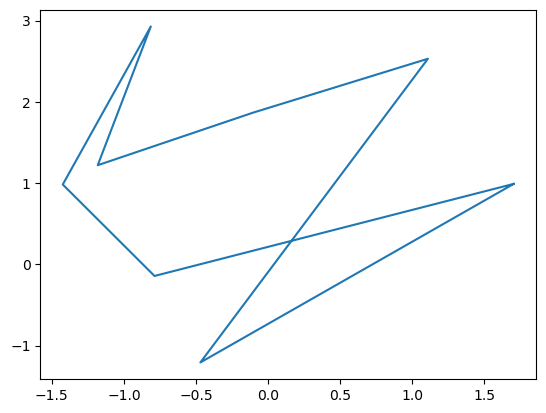

In [58]:
pts2 = pts.values
pts2 = np.vstack([pts2, pts2[0]])
plt.plot(pts2[:,0], pts2[:,1], '-')

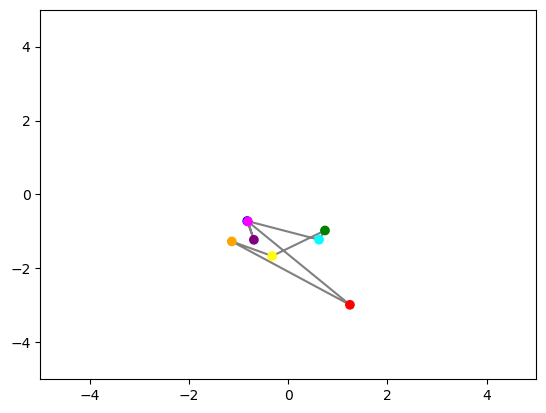

In [59]:
# for w in win_cts.index.get_level_values('win').unique():
#     win_cts.xs(w, level='win').plot.scatter(x='PC1', y='PC2',c=colors)

fig, ax = plt.subplots()
pts = win_cts.xs(0, level='win')[['PC1', 'PC2']]
pts2 = pts.values
pts2 = np.vstack([pts2, pts2[0]])
lines = ax.plot(pts2[:,0], pts2[:,1], '-', c='gray')
scat = ax.scatter(pts['PC1'], pts['PC2'], c=colors, zorder=3)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

def update(i):
    pts = win_cts.xs(i, level='win')[['PC1', 'PC2']]
    pts2 = pts.values
    pts2 = np.vstack([pts2, pts2[0]])
    for l in lines:
        l.set_data(pts2[:,0], pts2[:,1])
    scat.set_offsets(win_cts.xs(i, level='win')[['PC1', 'PC2']])
    return (scat, *lines)

ani = animation.FuncAnimation(fig, update, frames=win_cts.index.get_level_values('win').unique(), interval=500, blit=True)
ani.save('ani.gif', writer='pillow')